In [2]:
from context import samsurf
from samsurf.triangulation import Triangulation
import samsurf.geom_equiv as ge
from samsurf.point_orbits import *

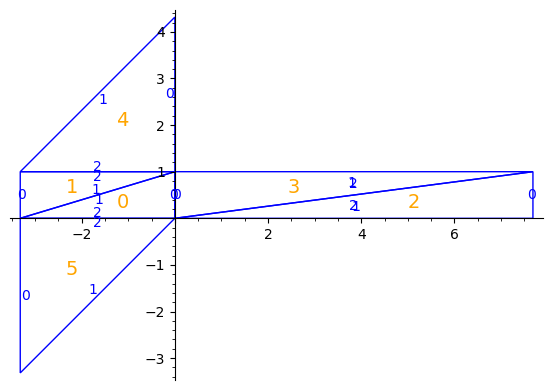

In [3]:
ronen44 = Triangulation.ronen_l(44)

old_trin = ronen44

veech_gens = old_trin.generators_veech.gens
old_trin.plot()


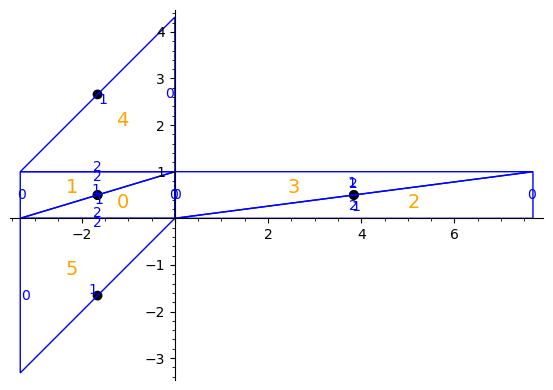

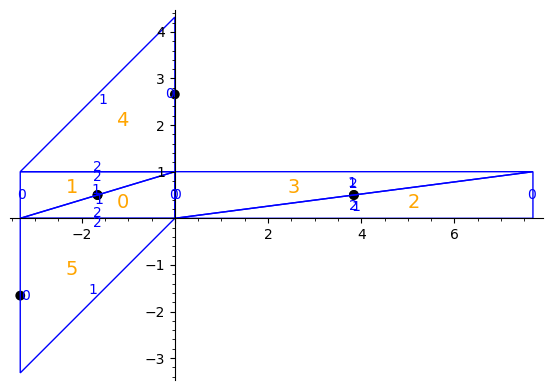

{(0, (0, 1/2, 1/2)),
 (1, (0, 1/2, 1/2)),
 (2, (0, 1/2, 1/2)),
 (3, (0, 1/2, 1/2)),
 (4, (1/2, 1/2, 0)),
 (5, (1/2, 1/2, 0))}

In [4]:
# testing veech_action_on_points

def mark_points(trin, points_set, rgbcolor=(0, 0, 0)):
    trin_copy = trin
    for tri_id, pt_coords in points_set:
        trin_copy = trin_copy.mark_point(tri_id, pt_coords, rgbcolor)
    return trin_copy

in_set = {(i, (0, 1/2, 1/2)) for i in range(6)}

# in_set = {(4, (0, 1/2, 1/2))}

out_set = veech_action_on_points(old_trin, veech_gens[2], in_set)

mark_points(old_trin, in_set).plot().show()
mark_points(old_trin, out_set).plot().show()
out_set

{(4, (0, 1/2, 1/2)), (3, (1/2, 1/2, 0)), (5, (1/2, 1/2, 0)), (4, (1/2, 0, 1/2)), (0, (1/3, 1/3, 1/3)), (2, (1/3, 1/3, 1/3)), (3, (1/3, 1/3, 1/3)), (1, (0, 1/2, 1/2)), (4, (1/2, 1/2, 0)), (5, (1/3, 1/3, 1/3)), (1, (1/2, 0, 1/2)), (0, (0, 1/2, 1/2)), (4, (1/3, 1/3, 1/3)), (2, (0, 1/2, 1/2)), (1, (1/2, 1/2, 0)), (3, (0, 1/2, 1/2)), (0, (1/2, 0, 1/2)), (5, (0, 1/2, 1/2)), (2, (1/2, 0, 1/2)), (1, (1/3, 1/3, 1/3)), (3, (1/2, 0, 1/2)), (0, (1/2, 1/2, 0)), (5, (1/2, 0, 1/2)), (2, (1/2, 1/2, 0))}


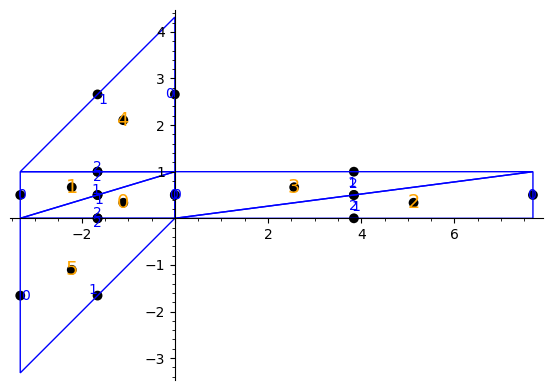

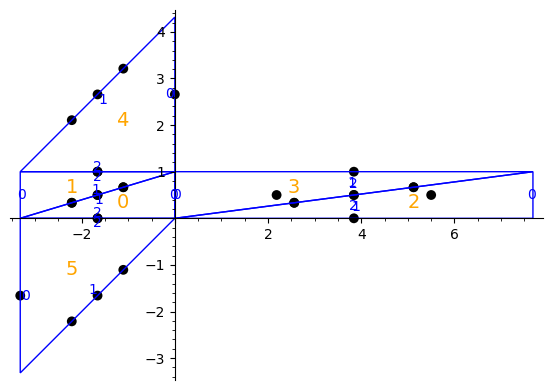

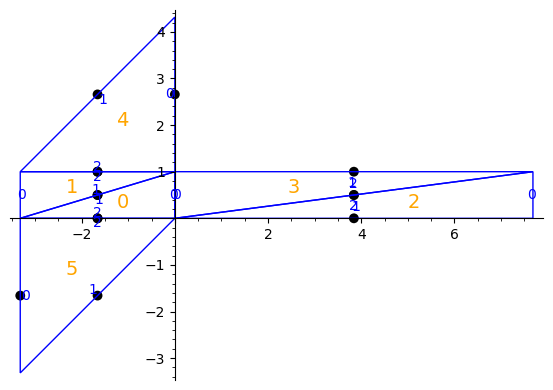

{(0, (0, 1/2, 1/2)),
 (0, (1/2, 0, 1/2)),
 (1, (0, 1/2, 1/2)),
 (1, (1/2, 0, 1/2)),
 (2, (0, 1/2, 1/2)),
 (2, (1/2, 0, 1/2)),
 (3, (0, 1/2, 1/2)),
 (3, (1/2, 0, 1/2)),
 (4, (0, 1/2, 1/2)),
 (4, (1/2, 0, 1/2)),
 (4, (1/2, 1/2, 0)),
 (5, (0, 1/2, 1/2)),
 (5, (1/2, 0, 1/2)),
 (5, (1/2, 1/2, 0))}

In [5]:
# testing the stability of subsets


def mark_points(trin, points_set, rgbcolor=(0, 0, 0)):
    trin_copy = trin
    for tri_id, pt_coords in points_set:
        trin_copy = trin_copy.mark_point(tri_id, pt_coords, rgbcolor)
    return trin_copy

in_set = {(i, (0, 1/2, 1/2)) for i in range(6)}.union(
            {(i, (1/2, 0, 1/2)) for i in range(6)},
            {(i, (1/2, 1/2, 0)) for i in range(6)},
            {(i, (1/3, 1/3, 1/3)) for i in range(6)})
print(in_set)
# in_set = {(4, (0, 1/2, 1/2))}

out_set = veech_action_on_points(old_trin, veech_gens[2], in_set)

mark_points(old_trin, in_set).plot().show()
mark_points(old_trin, out_set).plot().show()


preserved_pts = points_preserved(old_trin, veech_gens[2], in_set)
mark_points(old_trin, preserved_pts).plot().show()
preserved_pts

In [9]:
import random

def random_nice_point(trin, max_denom=10):
    tri_id = random.randint(0, len(trin.triangles) - 1)
    denom = random.randint(2, max_denom)
    numer = random.randint(1, denom - 1)
    one_coord = QQ(numer/denom)
    other_coord = (1 - one_coord)/2
    coords = [one_coord, other_coord, other_coord]
    random.shuffle(coords)
    return (tri_id, tuple(coords))


random_nice_point(old_trin)

(1, (3/4, 1/8, 1/8))

Initially marked points



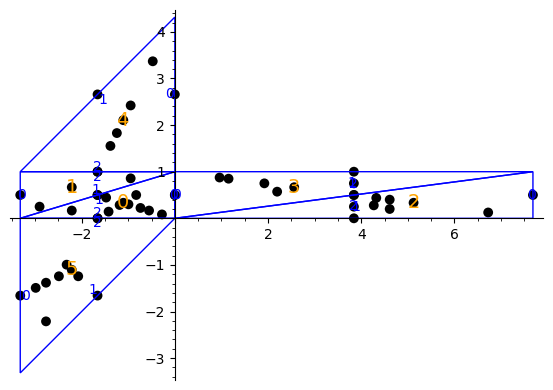

Marked points after one veech_elem action 



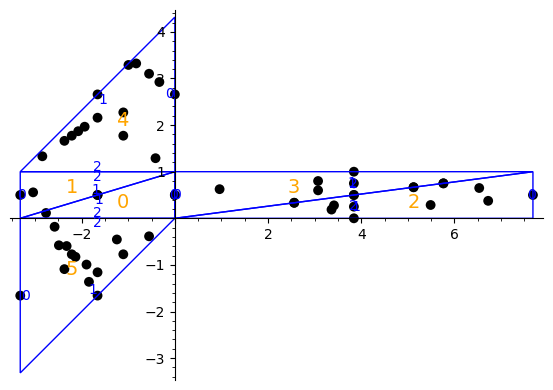

Points preserved by veech_elem action 



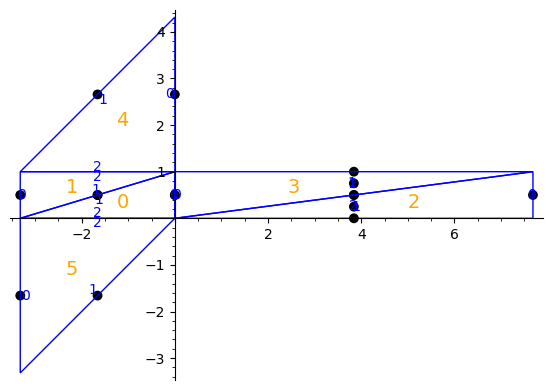

And finally, the periodic points 



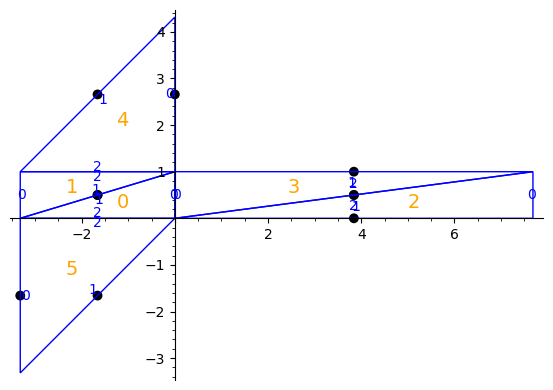

{(0, (0, 1/2, 1/2)),
 (1, (0, 1/2, 1/2)),
 (2, (0, 1/2, 1/2)),
 (2, (1/2, 0, 1/2)),
 (3, (0, 1/2, 1/2)),
 (3, (1/2, 0, 1/2)),
 (4, (0, 1/2, 1/2)),
 (4, (1/2, 1/2, 0)),
 (5, (0, 1/2, 1/2)),
 (5, (1/2, 1/2, 0))}

In [13]:
# making sure random points don't break things

in_set = {(i, (0, 1/2, 1/2)) for i in range(6)}.union(
            {(i, (1/2, 0, 1/2)) for i in range(6)},
            {(i, (1/2, 1/2, 0)) for i in range(6)},
            {(i, (1/3, 1/3, 1/3)) for i in range(6)},
            {random_nice_point(old_trin) for _ in range(40)})



print("Initially marked points\n")
mark_points(old_trin, in_set).plot().show()

print("Marked points after one veech_elem action \n")
out_set = veech_action_on_points(old_trin, veech_gens[0], in_set)
mark_points(old_trin, out_set).plot().show()

preserved_pts = points_preserved(old_trin, veech_gens[0], in_set)
print("Points preserved by veech_elem action \n")
mark_points(old_trin, preserved_pts).plot().show()
preserved_pts

print("And finally, the periodic points \n")
periodic_pts = reduce_periodic_points(old_trin, in_set)
mark_points(old_trin, periodic_pts).plot().show()
periodic_pts


In [16]:
#scratch cell

new = {1, 2, 3}
old = new.copy()
new.add(4)
old, new

({1, 2, 3}, {1, 2, 3, 4})

## Old tests

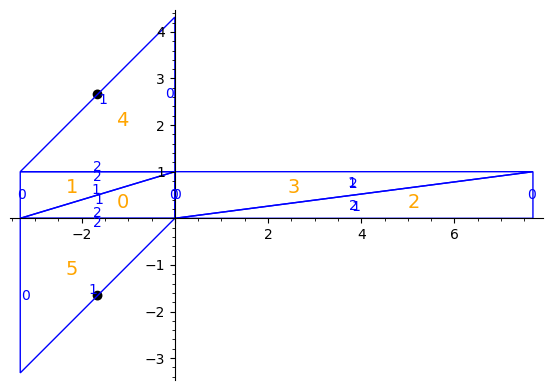

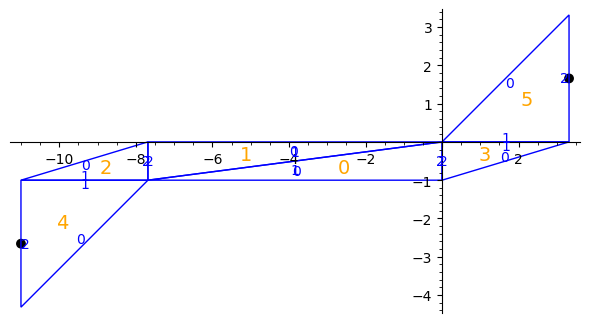

In [5]:
marked_trin = old_trin.mark_point(4, (0, 1/2, 1/2), (0, 0, 0))

marked_trin.plot().show()

# [h.id_edge for h in marked_trin.hinges if h.is_convex and h.incircle_det == 0]

# marked_trin.flip_hinge((1, 2)).plot().show()

acted_trin = marked_trin.apply_matrix(veech_gens[2]).make_delaunay(equiv_trin=marked_trin)

acted_trin.plot().show()

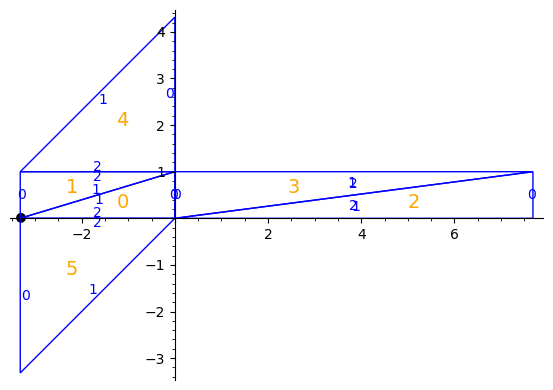

In [22]:
#figuring out the bary convention

marked_trin = old_trin.mark_point(1, (0.005, 0.99, 0.005), (0, 0, 0))

marked_trin.plot()

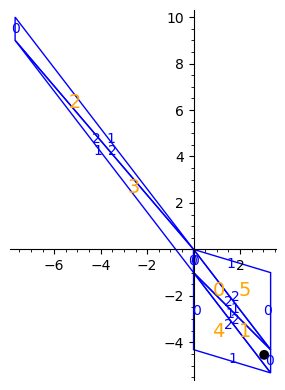

Sum 1/22*a of type Number Field in a with defining polynomial x^2 - 44 with a = 6.633249580710800? not equal to 0


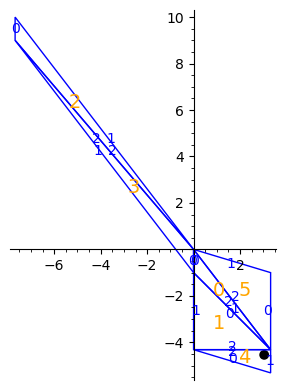

In [12]:
# case to debug

marked_trin = old_trin.mark_point(1, (1/2, 5/12, 1/12), (0, 0, 0))
debug_trin = marked_trin.apply_matrix(veech_gens[0])

debug_trin.plot().show()

debug_trin.triangles[1].points_marked


debug_trin.flip_hinge((1, 2)).plot()

In [6]:
t = (1, 2, 3)
d = {1:2}


# t.copy()
d.copy()

{1: 2}

In [3]:
# generator test

l = [0, 1, 2, 3]

def subset_gen(l):
#     print(f"checking list {l}")
    if len(l) == 0:
        yield []
        return
    else:
        yield from [subset for subset in subset_gen(l[:-1])]
        yield from [[l[-1]]+subset for subset in subset_gen(l[:-1])]

for s in subset_gen(l):
    print(s)

[]
[0]
[1]
[1, 0]
[2]
[2, 0]
[2, 1]
[2, 1, 0]
[3]
[3, 0]
[3, 1]
[3, 1, 0]
[3, 2]
[3, 2, 0]
[3, 2, 1]
[3, 2, 1, 0]
